In [1]:
using ValidatedNumerics

In [2]:
import Base.split

function split{T}(x::Interval{T}, n::Integer)
    
    width = diam(x) / n
    
    intervals = [Interval(x.lo + width*i, x.lo + width*(i+1)) for i in 0:n-1]
    
end

function split{T}(X::IntervalBox{2,T}, n::Integer, m::Integer=n)
    x, y = X
        
    x_intervals = split(x, m)
    y_intervals = split(y, n)
    
    boxes = IntervalBox{2,T}[]
    
    for i in x_intervals, j in y_intervals
        push!(boxes, IntervalBox(i, j))
    end
    
    boxes
    
end


    split(ValidatedNumerics.IntervalBox{2, #T<:Any}, Integer, Integer) at In[2]:12
is ambiguous with: 
    split(Any, Any, Bool) at deprecated.jl:49.
To fix, define 
    split(ValidatedNumerics.IntervalBox{2, #T<:Any}, Integer, Bool)
before the new definition.


split (generic function with 9 methods)

In [3]:
X = IntervalBox(0..1, 0..1)


input = split(X, 3)
input

9-element Array{ValidatedNumerics.IntervalBox{2,Float64},1}:
 IntervalBox([0.0, 0.3333333333333333],[0.0, 0.3333333333333333])                              
 IntervalBox([0.0, 0.3333333333333333],[0.3333333333333333, 0.6666666666666666])               
 IntervalBox([0.0, 0.3333333333333333],[0.6666666666666666, 1.0])                              
 IntervalBox([0.3333333333333333, 0.6666666666666666],[0.0, 0.3333333333333333])               
 IntervalBox([0.3333333333333333, 0.6666666666666666],[0.3333333333333333, 0.6666666666666666])
 IntervalBox([0.3333333333333333, 0.6666666666666666],[0.6666666666666666, 1.0])               
 IntervalBox([0.6666666666666666, 1.0],[0.0, 0.3333333333333333])                              
 IntervalBox([0.6666666666666666, 1.0],[0.3333333333333333, 0.6666666666666666])               
 IntervalBox([0.6666666666666666, 1.0],[0.6666666666666666, 1.0])                              

In [9]:
f(xx::IntervalBox) = ((x,y)=xx; IntervalBox(2x + y, x + y))

f (generic function with 1 method)

In [10]:
output = map(f, input)

9-element Array{ValidatedNumerics.IntervalBox{2,Float64},1}:
 IntervalBox([0.0, 1.0],[0.0, 0.6666666666666666])                                             
 IntervalBox([0.3333333333333333, 1.3333333333333333],[0.3333333333333333, 1.0])               
 IntervalBox([0.6666666666666666, 1.6666666666666667],[0.6666666666666666, 1.3333333333333335])
 IntervalBox([0.6666666666666666, 1.6666666666666667],[0.3333333333333333, 1.0])               
 IntervalBox([0.9999999999999999, 2.0],[0.6666666666666666, 1.3333333333333333])               
 IntervalBox([1.3333333333333333, 2.3333333333333335],[0.9999999999999999, 1.6666666666666667])
 IntervalBox([1.3333333333333333, 2.3333333333333335],[0.6666666666666666, 1.3333333333333335])
 IntervalBox([1.6666666666666665, 2.666666666666667],[0.9999999999999999, 1.6666666666666667]) 
 IntervalBox([1.9999999999999998, 3.0],[1.3333333333333333, 2.0])                              

In [35]:
include("draw_function_image.jl")

draw (generic function with 4 methods)

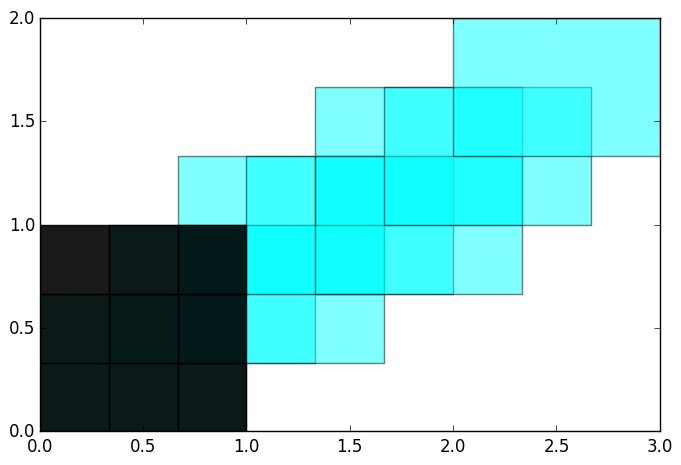

(0.0,3.0,0.0,2.0)

In [40]:
draw(output, "cyan")
draw(input, "black", 0.9)

axis("image")

In [26]:
using Interact

In [83]:

function draw_image(f, X, color="cyan")
    fig = figure()
    @manipulate for n in 1:100
        withfig(fig) do
            input = split(X, n)
            output = map(f, input)

            draw(output, color, 0.1)
            draw(input, "grey", 0.1)

            axis("image")
        end
    end
    
end

draw_image (generic function with 2 methods)

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"n",25,1:50,true)

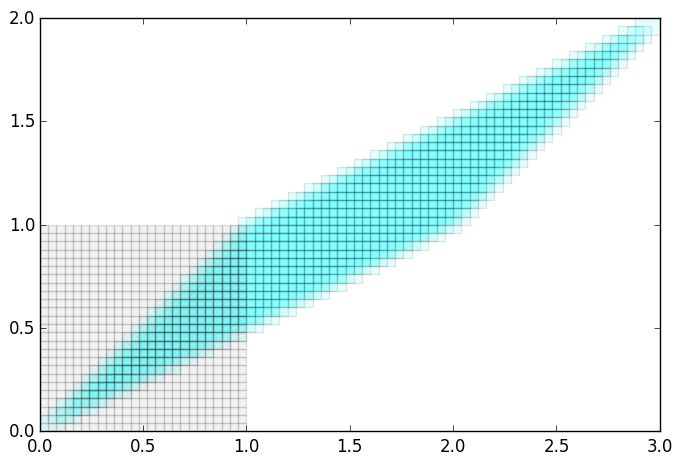

In [75]:
draw_image(f, IntervalBox(0..1, 0..1))

In [29]:
function standard_map(X::IntervalBox, k = 1.0)
    p, θ = X
    
    p′ = p + k*sin(θ)
    θ′ = θ + p′
    
    IntervalBox(p′, θ′)
end

standard_map (generic function with 2 methods)

In [85]:
function iterate(f, n, x)
    for i in 1:n
        x = f(x)
    end
    x
end

iterate (generic function with 1 method)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"n",50,1:100,true)

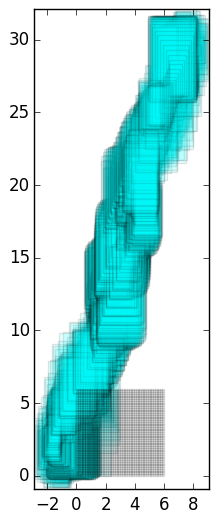

In [87]:
#@manipulate for i in 1:10, j in 1:10

i = 9
j = 8

#X = IntervalBox((i/10)*2pi..(i+1)/10*2pi, (j/10)*2pi..(j+1)/10*2pi)

X = IntervalBox(0..6, 0..6)

draw_image(x -> iterate(standard_map, 4, x), X)

#axis([0, 2pi, 0, 2pi])
    #axis("image")
#end

In [94]:
import Base.mod 
function mod(X::Interval, width::Real)
    if diam(X) > 1.
        return [Interval(0, width)]
    end

    X = X / width
    
    a = X.lo - floor(X.lo)
    b = X.hi - floor(X.hi)
    
    if a < b
        return [Interval(a, b)]
        
    end
    
    return [Interval(0, b), Interval(a, 1)]
    
end

mod (generic function with 42 methods)

In [95]:
mod(Interval(0.3, 0.5), 1)

1-element Array{ValidatedNumerics.Interval{Float64},1}:
 [0.3, 0.5]

In [96]:
mod(Interval(0.3, 1.2), 1)

2-element Array{ValidatedNumerics.Interval{Float64},1}:
 [0.0, 0.19999999999999996]
 [0.3, 1.0]                

In [97]:
mod(Interval(0.3, 1.5), 1)

1-element Array{ValidatedNumerics.Interval{Float64},1}:
 [0.0, 1.0]

In [107]:
function mod(X::IntervalBox, width::Real)
    x, y = X
    
    xx = mod(x, width)
    yy = mod(y, width)
    
    vec([IntervalBox(x, y) for x in xx, y in yy])
end

mod (generic function with 43 methods)

In [109]:
X = IntervalBox(0..0.5, 0.1..0.6)
mod(X, 1)

1-element Array{Any,1}:
 IntervalBox([0.0, 0.5],[0.09999999999999999, 0.6000000000000001])

In [108]:
X = IntervalBox(0..0.5, 0.9..1.1)
mod(X, 1)

2-element Array{Any,1}:
 IntervalBox([0.0, 0.5],[0.0, 0.10000000000000009])
 IntervalBox([0.0, 0.5],[0.8999999999999999, 1.0]) 

In [111]:
X = IntervalBox(0.8..1.2, 0.8..1.2)
mod(X, 1)

4-element Array{Any,1}:
 IntervalBox([0.0, 0.20000000000000018],[0.0, 0.20000000000000018])
 IntervalBox([0.7999999999999999, 1.0],[0.0, 0.20000000000000018]) 
 IntervalBox([0.0, 0.20000000000000018],[0.7999999999999999, 1.0]) 
 IntervalBox([0.7999999999999999, 1.0],[0.7999999999999999, 1.0])  

In [99]:
help("outer")

LoadError: LoadError: UndefVarError: help not defined
while loading In[99], in expression starting on line 1

In [100]:
?outer

search: count_zeros RoundToZero OutOfMemoryError RoundTiesToEven RoundTiesToAway

Couldn't find outer

LoadError: LoadError: "outer" is not defined in module Main
while loading In[100], in expression starting on line 119


Perhaps you meant over, super, Out, output, oct, one, ones, open or operm


In [101]:
X

[0.0, 6.0] × [0.0, 6.0]

In [102]:
x, y = X

[0.0, 6.0] × [0.0, 6.0]

In [103]:
x, y

([0.0, 6.0],[0.0, 6.0])

In [104]:
X = IntervalBox(1..1, 2..2, 3..3)

[1.0, 1.0] × [2.0, 2.0] × [3.0, 3.0]

In [105]:
x, y = X

[1.0, 1.0] × [2.0, 2.0] × [3.0, 3.0]

In [106]:
x, y

([1.0, 1.0],[2.0, 2.0])